# Hoofdstuk 7 Slimme Functies

## Woonhuizen worden duurder

In [1]:
# imports voor alle volgende cellen
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget
from slimmeFuncties import *

In [ ]:
def plotWoonhuizenPerProvincie(file="csv/immo_by_province.csv"):
    immo = pd.read_csv(file, sep=";", encoding="latin-1")
    huizen = immo[immo["soort"]=="gewone woonhuizen"]
    limburg = huizen[huizen["regio"]=="PROVINCIE LIMBURG"]
    antwerpen = huizen[huizen["regio"]=="PROVINCIE ANTWERPEN"]
    vlBrabant = huizen[huizen["regio"]=="PROVINCIE VLAAMS-BRABANT"]
    plt.plot(limburg["jaar"], limburg["prijs"], color="r", label="Limburg")
    plt.plot(antwerpen["jaar"], antwerpen["prijs"], color="g", label="Antwerpen")
    plt.plot(vlBrabant["jaar"], vlBrabant["prijs"], color="b", label="Vlaams-Brabant")
    plt.legend()
    plt.ylabel("prijs (€)")
    plt.show()

plotWoonhuizenPerProvincie( )

### Analyse

We kunnen op de drie plots curve-fitting toepassen. 

Welke vergelijkingen krijg je dan en wat is de R²?

Is het interessant om op te splitsen in de periode voor en na 2005?

Welke vergelijkingen krijg je dan en wat is de R²?

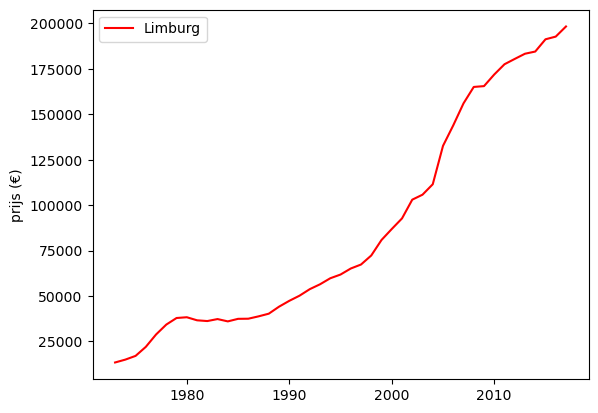

In [2]:
# ruimte om te experimenteren
def analyseWoonhuizenPerProvincie(file="csv/immo_by_province.csv"):
    immo = pd.read_csv(file, sep=";", encoding="latin-1")
    huizen = immo[immo["soort"]=="gewone woonhuizen"]
    limburg = huizen[huizen["regio"]=="PROVINCIE LIMBURG"]
    antwerpen = huizen[huizen["regio"]=="PROVINCIE ANTWERPEN"]
    vlBrabant = huizen[huizen["regio"]=="PROVINCIE VLAAMS-BRABANT"]
    
    # plot alleen limburg
    xAs = limburg["jaar"]
    plt.plot(xAs, limburg["prijs"], color="r", label="Limburg")
    # maak een paar modellen voor limburg (1e, 2e, 3e graadsveelterm)
    # plot die van 2000 tot 2030 en druk R² af    
    xAs2 = range(2000,2030)
    plt.legend()
    plt.ylabel("prijs (€)")
    plt.show()

analyseWoonhuizenPerProvincie( )

## Wrijvingskracht

In [ ]:
def plotWrijvingskracht(file="csv/Wrijvingskracht.csv"):
    df = pd.read_csv(file, sep=";", encoding="latin-1")
    plt.plot(df["Tijd (s)"], df["Kracht (N)"])
    plt.title("Kracht in functie van de tijd")
    plt.grid(True)
    plt.show()

plotWrijvingskracht()

## Analyse

- In de eerste fase gebeurt er nog niks interessant: knip die weg.
- Tweede fase = stijgende helling: houd alleen die over
- Derde fase = dalende helling
- Vierde fase = plateaufase: selecteer en bereken zwevend gemiddelde

In [ ]:
# experimenteerruimte

## Covid-golven

In [ ]:
def plotCovidOrigineel(file="csv/COVID19worldwide2.csv"):
    df = pd.read_csv(file, sep=";", encoding="latin-1")
    
    plt.plot(df["dagID"], df["Belgie"], label="Belgie")
    #plt.plot(df["dagID"], df["Nederland"], label="Nederland")
    plt.plot(df["dagID"], df["Duitsland"], linestyle="--", label="Duitsland")
    #plt.plot(df["dagID"], df["Frankrijk"], label="Frankrijk")
    #plt.plot(df["dagID"], df["Denemarken"], label="Denemarken")
    plt.plot(df["dagID"], df["Zweden"], linestyle=":", label="Zweden")
    plt.title("Aantal covid-gevallen per land")
    plt.legend()
    plt.ylabel("Aantal besmettingen")
    plt.xlabel("Dagnummer in 2020")
    plt.grid(True)
    plt.show()

plotCovidOrigineel()  

### Analyse

- Waarom die rare schommelingen?
- Hoe kunnen we golven herkennen?

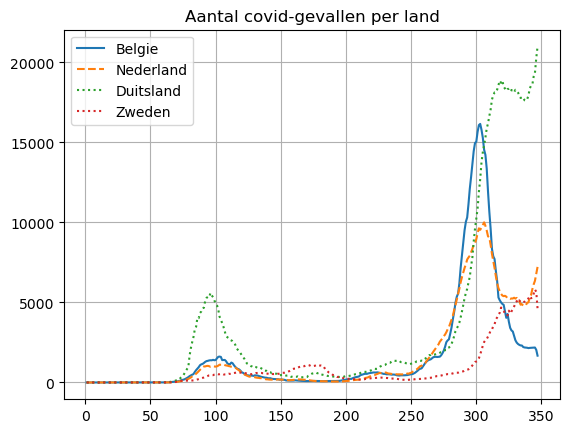

In [3]:
def plotCovid(file="csv/COVID19worldwide2.csv"):
    df = pd.read_csv(file, sep=";", encoding="latin-1")

    # weekendschommeling wegwerken
    df["Belgie2"] = zwevendGemiddelde(df["Belgie"],7)
    df["Nederland2"] = zwevendGemiddelde(df["Nederland"],7)
    df["Duitsland2"] = zwevendGemiddelde(df["Duitsland"],7)
    df["Zweden2"] = zwevendGemiddelde(df["Zweden"],7)
    
    plt.plot(df["dagID"], df["Belgie2"], label="Belgie")
    plt.plot(df["dagID"], df["Nederland2"], linestyle="--", label="Nederland")
    plt.plot(df["dagID"], df["Duitsland2"], linestyle=":", label="Duitsland")
    plt.plot(df["dagID"], df["Zweden2"], linestyle=":", label="Zweden")
    plt.title("Aantal covid-gevallen per land")
    plt.legend()
    plt.grid(True)
    plt.show()

plotCovid()

In [ ]:
# ruimte om te experimenteren